In [14]:
# 導入函式庫以及讀取資料
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import export_text, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import numpy as np

df = pd.read_csv("water_potability.csv")

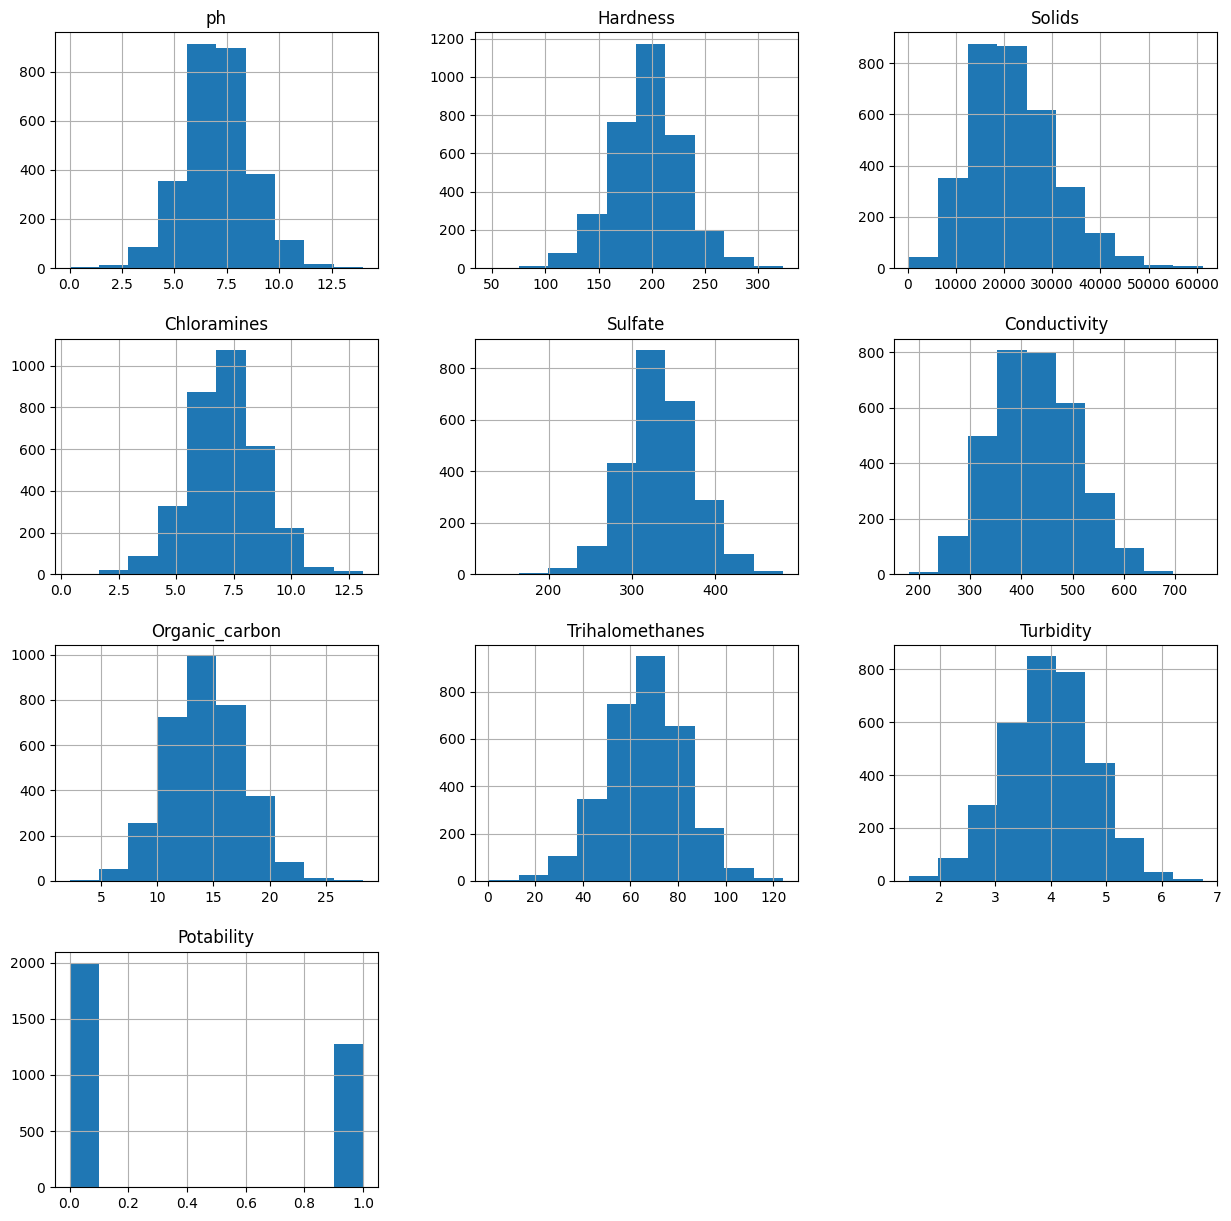

In [3]:
# 特徵分布分析
df.hist(figsize=(15, 15))
plt.show()

<Axes: >

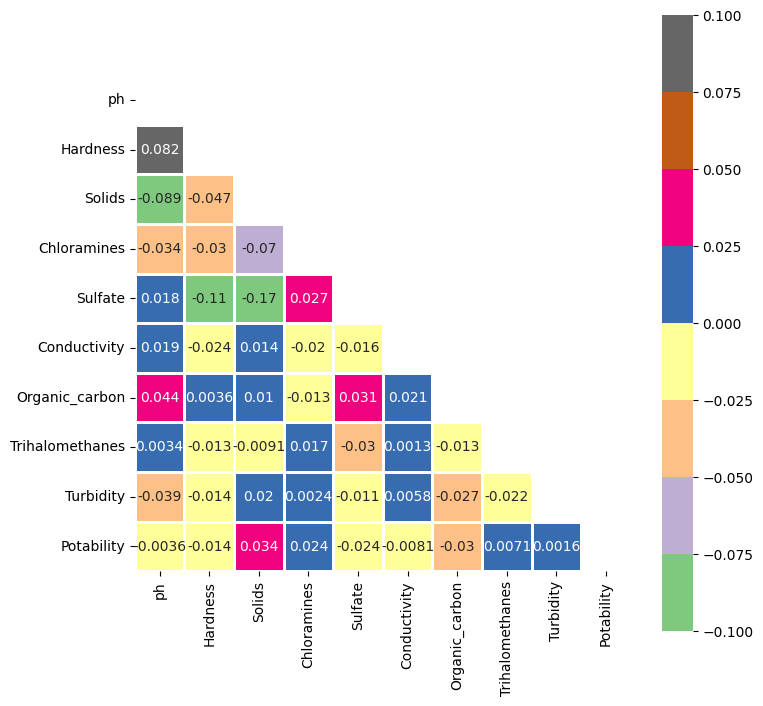

In [52]:
# 分析特徵相依性
# 正數為有正關聯，負數則為負關聯
plt.figure(figsize=(8, 8))
corrMask = np.triu(df.corr())
sns.heatmap(
    df.corr(),
    linewidths=1,
    annot=True,
    square=True,
    vmin=-0.1,
    vmax=0.1,
    mask=corrMask,
    cmap="Accent",
)

In [5]:
# 填補空缺值
empty = df.columns[df.isna().any()].tolist()
print("有空缺的資料：", empty)
print("填補空缺值...")
for i in empty:
    df[i].fillna(value=df[i].median(), inplace=True)
print("確認填補結果：")
print(df.isnull().sum())

有空缺的資料： ['ph', 'Sulfate', 'Trihalomethanes']
填補空缺值...
確認填補結果：
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


In [6]:
# 切分特徵和目標變量
X = df.drop("Potability", axis=1)
y = df["Potability"]
# 切分訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [7]:
# 邏輯回歸
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_y = lr_model.predict(X_test)
print(accuracy_score(lr_y, y_test))
feat_list = []
# Make a dataframe of coefficients and feature Names
for feature in zip(X, lr_model.coef_[0]):
    feat_list.append(feature)
# create dataFrame using data
df_imp = pd.DataFrame(feat_list, columns=["Features", "Coefficienct"])
df_imp.sort_values(by="Coefficienct", ascending=False)

0.6280487804878049


,Features,Coefficienct
7,Trihalomethanes,0.001813
3,Chloramines,0.000305
2,Solids,0.000008
8,Turbidity,-0.000081
5,Conductivity,-0.000159
0,ph,-0.000195
4,Sulfate,-0.001143
6,Organic_carbon,-0.001232
1,Hardness,-0.001279
